# Required assignment 14.1: Applying SVM in Python


### Overview
The data set used in this assignment is a subsampled version of the well-known MNIST data set, which contains images of handwritten digits. Each image is represented by a set of numerical values corresponding to pixel intensities, and each record is labelled with the digit it represents (from 0 to 9).  
##### Download the data from [Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv)

### Data set source and availability
The original MNIST data set can be accessed from Kaggle, where it is available in CSV format.

The full data set consists of a training set with 60,000 examples and a test set with 10,000 examples.

For this assignment, a subset of 2,000 records has been selected from the original data set to facilitate efficient analysis and processing.

### Data structure
**Rows**: Each row in the data set corresponds to a single handwritten digit image.

**Columns**:

The first column, label, indicates the true digit (0–9) represented by the image.

The remaining columns represent the pixel values of the image.

### Image representation
Each image is a greyscale 28 × 28 pixel grid, resulting in 784 predictor columns per record.

The pixel values are integers, typically ranging from 0 (white) to 255 (black), representing the intensity of each pixel.

The original digit images were normalised to fit within a 20 × 20 pixel box, preserving their aspect ratios. Anti-aliasing was applied during normalisation, resulting in greyscale images.

The normalised images were then centred in a 28 × 28 field by aligning the centre of mass of the pixels to the centre of the image grid.

**NOTE:**

Due to the extensive size of the original data set, only a randomly selected subset of 2,000 records is used for this assignment. This allows for manageable computation while maintaining the essential characteristics of the MNIST data set.


In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


### Question 1:
- Load the training and test sets as pandas DataFrames.
- Assign them to `train` and `test,` respectively.

In [2]:
###GRADED
train = ...
test = ...

# YOUR CODE HERE
# raise NotImplementedError()

train = pd.read_csv("data/mnist_subsample_train.csv")
test = pd.read_csv("data/mnist_subsample_test.csv")

print("Training set shape:", train.shape, "test set shape:", test.shape)

Training set shape: (1600, 785) test set shape: (400, 785)


The data set is inspected for missing values, and the columns are also inspected.

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', 'label'],
      dtype='object', length=785)

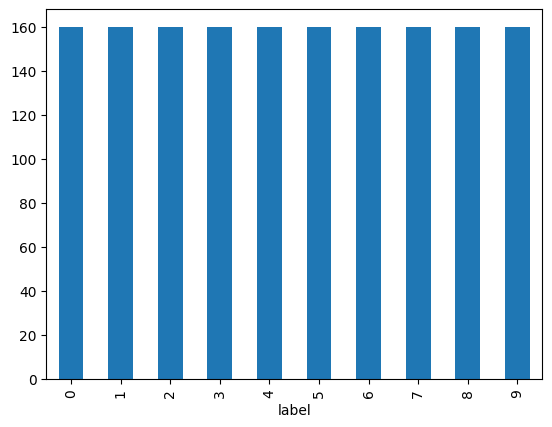

In [5]:
train.label.value_counts()[[0,1,2,3,4,5,6,7,8,9]].plot(kind='bar');

The above bar chart signifies that the subsample contains an equal number of digits from 0 to 9 in the training data set. This is an unbiased subsample.

In [6]:
np.sum(train.isnull().sum()) + np.sum(test.isnull().sum()) #Equal to zero, no nulls at all

0

**Visualise any specific row you like.**

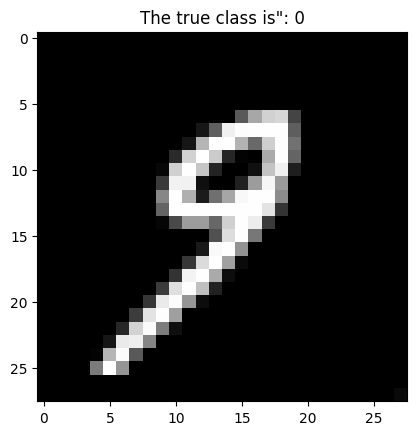

In [7]:
instance = 100 #Change this freely to see different visualisations
plt.imshow(np.reshape(np.array(train.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i' %train.iloc[instance, 0])
plt.show()

**Before training, the data set is first standardised.**

In [8]:
#First, standardise
train_X = train.iloc[:,1:] #Predictors of the training set
train_y = train.label #Targets (true digits) of the training set
test_X = test.iloc[:,1:] #Predictors of the test set
test_y = test.label #Targets (true digits) of the test set



In [9]:
#Only standardise the predictors. Keep the code below.
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_X)
train_X = scaling.transform(train_X)
test_X = scaling.transform(test_X)

In this assignment, you will train the data set using different kernels and choose the classifiers that perform the best based on the predictions of the test set.

### Question 2:
The first classifier is the linear classifier.
- Train a linear classifer and save it to `clf1`.
- Use `clf1` to predict the output on `train_X` and store it to `pred1_train`.
- Create a confusion matrix `cm1_train` between `train_y` and `pred1_train`.
- Compute the `accuracy_score` between `train_X` and `pred1_train` and store it to `acc1_train`.
- Use `clf1` to predict the output on `test_X` and store it to `pred1_test`.
- Create a confusion matrix `cm1_test` between `test_y` and `pred1_test`.
- Compute the `accuracy_score` between `test_X` and `pred1_test` and store it to `acc1_test`.



In [10]:
###GRADED CELL
clf1 = ...
pred1_train = ...
cm1_train = ...
acc1_train = ...
pred1_test = ...

cm1_test = ...
acc1_test = ...

# YOUR CODE HERE
# raise NotImplementedError()

clf1 = svm.SVC(kernel='linear')

# Predictions on training set
pred1_train = clf1.fit(train_X, train_y).predict(train_X)

# Confusion matrix for training
cm1_train = confusion_matrix(train_y, pred1_train)

# Training accuracy
acc1_train = accuracy_score(train_y, pred1_train)

# Predictions on test set
pred1_test = clf1.predict(test_X)

# Confusion matrix for test set
cm1_test = confusion_matrix(test_y, pred1_test)

# Test accuracy
acc1_test = accuracy_score(test_y, pred1_test)

print("Confusion matrix for test data using LINEAR kernel:\n", cm1_test)
print("Training accuracy:\n", acc1_train)
print("Test accuracy:\n", acc1_test)

Confusion matrix for test data using LINEAR kernel:
 [[40  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 1  1 34  2  1  0  1  0  0  0]
 [ 0  1  0 37  0  1  0  0  0  1]
 [ 0  0  0  0 38  0  1  0  0  1]
 [ 0  0  0  3  1 35  0  0  1  0]
 [ 0  0  1  0  1  0 38  0  0  0]
 [ 1  0  1  1  1  0  0 36  0  0]
 [ 0  0  0  2  0  2  0  0 35  1]
 [ 1  0  0  0  2  0  0  1  0 36]]
Training accuracy:
 1.0
Test accuracy:
 0.9225


**Visualise one test digit we correctly classified and another we misclassified.**

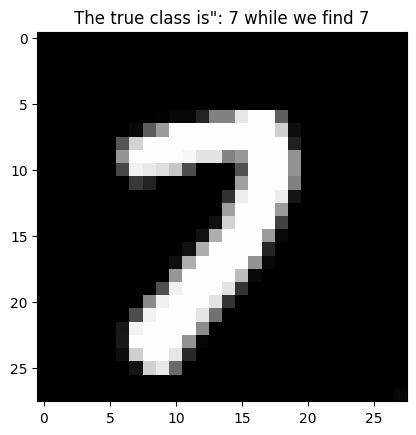

In [11]:
instance = 28 #Correct classification
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred1_test[instance]))
plt.show()

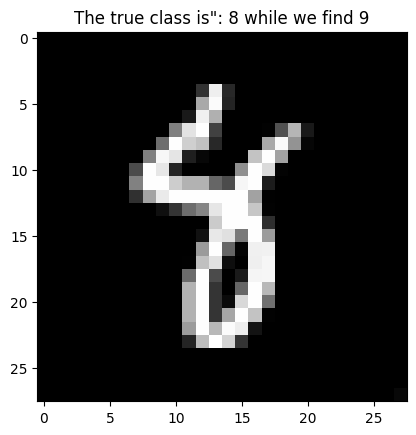

In [12]:
instance = 100#Wrong classification - it makes "sense" as it looks like 7 :)
plt.imshow(np.reshape(np.array(test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (test_y[instance], pred1_test[instance]))
plt.show()

### Question 3:

The next classifier uses an `RBF` kernel.

- Train an RBF classifier and save it to `clf2`.
- Use `clf2` to predict the output on `train_X` and store it to `pred2_train`.
- Create a confusion matrix `cm2_train` between `train_y` and `pred2_train`.
- Compute the accuracy_score between `train_X` and `pred2_train` and store it to `acc2_train`.
- Use `clf2` to predict the output on `test_X` and store it to `pred2_test`.
- Create a confusion matrix `cm2_test` between `test_y` and `pred2_test`.
- Compute the accuracy_score between `test_X` and `pred2_test` and store it to `acc2_test`.


In [13]:
###GRADED CELL
clf2 = ...
pred2_train = ...
cm2_train = ...
acc2_train = ...
pred2_test = ...
cm2_test = ...
acc2_test = ...

# YOUR CODE HERE
# raise NotImplementedError()

clf2 = svm.SVC(kernel='rbf')

# Predictions on training set
pred2_train = clf2.fit(train_X, train_y).predict(train_X)

# Confusion matrix for training
cm2_train = confusion_matrix(train_y, pred2_train)

# Training accuracy
acc2_train = accuracy_score(train_y, pred2_train)

# Predictions on test set
pred2_test = clf2.predict(test_X)

# Confusion matrix for test set
cm2_test = confusion_matrix(test_y, pred2_test)

# Test accuracy
acc2_test = accuracy_score(test_y, pred2_test)

print("Confusion matrix for test data:\n", cm2_test)
print("Training accuracy:\n", acc2_train)
print("Test accuracy:\n", acc2_test)

Confusion matrix for test data:
 [[40  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  2 37  1  0  0  0  0  0  0]
 [ 0  1  2 34  0  2  0  0  0  1]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  1  0  1 38  0  0  0  0]
 [ 0  0  4  0  0  0 36  0  0  0]
 [ 0  0  0  0  3  0  0 36  0  1]
 [ 0  0  2  0  0  2  0  0 35  1]
 [ 1  0  1  0  1  0  0  1  0 36]]
Training accuracy:
 0.98375
Test accuracy:
 0.93


### Question 4:

The next classifier uses a `polynomial` kernel.

- Train a "polynomial kernel with degree 8"  classifier and save it to `clf3`.
- Use `clf3` to predict the output on `train_X` and store it to `pred3_train`.
- Create a confusion matrix `cm3_train` between `train_y` and `pred3_train`.
- Compute the accuracy_score between `train_X` and `pred3_train` and store it to `acc3_train`.
- Use `clf3` to predict the output on `test_X` and store it to `pred3_test`.
- Create a confusion matrix `cm3_test` between `test_y` and `pred3_test`.
- Compute the accuracy_score between `test_X` and `pred3_test` and store it to `acc3_test`.


In [14]:
###GRADED CELL
clf3 = ...
pred3_train = ...
cm3_train = ...
acc3_train = ...
pred3_test = ...
cm3_test = ...
acc3_test = ...

# YOUR CODE HERE
# raise NotImplementedError()

clf3 = svm.SVC(kernel='poly', degree=8)

# Predictions on training set
pred3_train = clf3.fit(train_X, train_y).predict(train_X)

# Confusion matrix for training
cm3_train = confusion_matrix(train_y, pred3_train)

# Training accuracy
acc3_train = accuracy_score(train_y, pred3_train)

# Predictions on test set
pred3_test = clf3.predict(test_X)

# Confusion matrix for test set
cm3_test = confusion_matrix(test_y, pred3_test)

# Test accuracy
acc3_test = accuracy_score(test_y, pred3_test)

print("Confusion matrix for test data:\n", cm3_test)
print("Training accuracy:\n", acc3_train)
print("Test accuracy:\n", acc3_test)

Confusion matrix for test data:
 [[40  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  1 38  1  0  0  0  0  0  0]
 [ 0  0  1 37  0  1  0  0  0  1]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  1 39  0  0  0  0]
 [ 0  0  4  0  0  0 36  0  0  0]
 [ 1  0  0  1  1  0  0 36  0  1]
 [ 0  0  1  1  0  1  0  0 36  1]
 [ 1  0  0  0  1  0  0  1  0 37]]
Training accuracy:
 1.0
Test accuracy:
 0.9475


An SVM classifier using linear kernel is trained using cross-validation, and the mean accuracy is obtained using five-fold cross-validation on the training set to avoid data leakage.

In [15]:
from sklearn.model_selection import cross_val_score
clf3 = svm.SVC(kernel='linear')
scores = cross_val_score(clf3, test_X, test_y, cv=5, scoring='accuracy')
print(scores)
print("Mean accuracy:", scores.mean())



[0.8875 0.85   0.8125 0.8875 0.95  ]
Mean accuracy: 0.8775000000000001


### Question 5:
Which set of classifiers would be selected based on test accuracy?

a. Linear classifier

b. RBF classifier

c. Polynomial classifier with degree 8

d. Linear classifier with cross-validation

Type in your response to `ans5`.

In [16]:
### GRADED CELL
ans5 = ...

# YOUR CODE HERE
# raise NotImplementedError()
ans5 = 'c'

Only a small subsampled portion of the data set has been used for training and testing. Therefore, the results obtained do not guarantee the success or failure of any particular classifier. These outcomes are specific to this particular subset of data. Participants are encouraged to repeat the assignment using the full data set on their local machines to conduct a more comprehensive evaluation.